In [1]:
import pandas as pd

In [4]:
from nsepy import get_history as gh
import datetime as dt

In [9]:
import yfinance as yf
import datetime as dt

symbol = 'TATACOFFEE.NS'
start = dt.datetime(2021,6,1)
end = dt.datetime(2022,1,28)

# Retrieve historical stock data from Yahoo Finance
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [7]:
start = dt.datetime(2021,6,1)
end = dt.datetime(2022,1,28)
stk_data = gh(symbol=symbol,start=start,end=end)


Exception in thread Thread-10 (get_history):
Traceback (most recent call last):
  File "C:\Users\kmuth\anaconda3\envs\myenv\Lib\site-packages\nsepy\urls.py", line 42, in get_symbol_count
    return symbol_count[symbol]
           ~~~~~~~~~~~~^^^^^^^^
KeyError: 'TATACOFFEE.NS'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\kmuth\anaconda3\envs\myenv\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "C:\Users\kmuth\anaconda3\envs\myenv\Lib\site-packages\nsepy\commons.py", line 132, in run
    self.result = self._target(*self._args, **self._kwargs)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kmuth\anaconda3\envs\myenv\Lib\site-packages\nsepy\history.py", line 138, in get_history
    return get_history_quanta(**kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\kmuth\anaconda3\envs\myenv\Lib\site-packages\nsepy\history.py", line 142, in get_history

AttributeError: 'ThreadReturns' object has no attribute 'result'

In [10]:
stk_data=stk_data[["Open","High","Low","Close"]]
#stk_data.to_csv("Tatacoffee13_21.csv")

In [11]:
column="Close"

In [12]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (166, 1)


In [13]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

158
X_train length: (158, 1)
X_test length: (8, 1)
y_train length: (158, 1)
y_test length: (8, 1)


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.33092114556273156
maPe-Testset: 0.45072207914511675
************


C:\Users\kmuth\anaconda3\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=t
RMSE-Testset: 0.1939703166945272
maPe-Testset: 0.25416514110447586
************
Trend=c
RMSE-Testset: 0.08460113307796545
maPe-Testset: 0.10743368500659456
************
Trend=ct
RMSE-Testset: 0.1334149439071686
maPe-Testset: 0.1693997394467759
************


C:\Users\kmuth\anaconda3\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [16]:
len(y_pred)

8

In [17]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\kmuth\anaconda3\envs\myenv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.08217229170350464
maPe-Testset: 0.10434704306879844
************


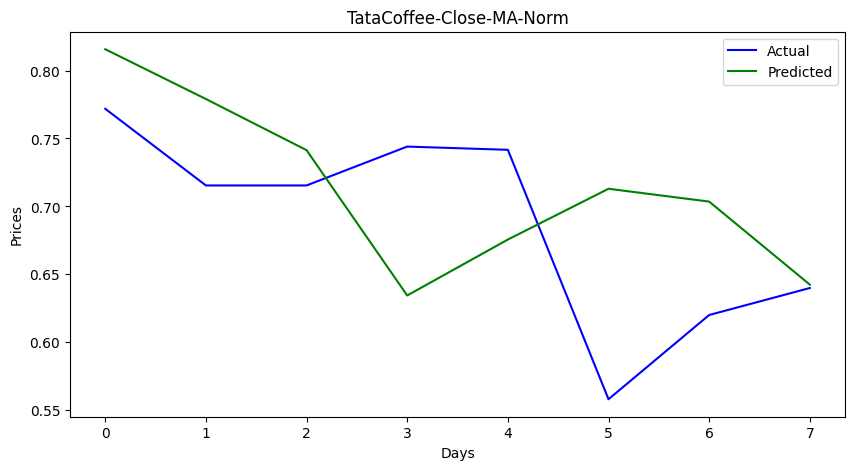

In [18]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [19]:
len(data1)

166

In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [21]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

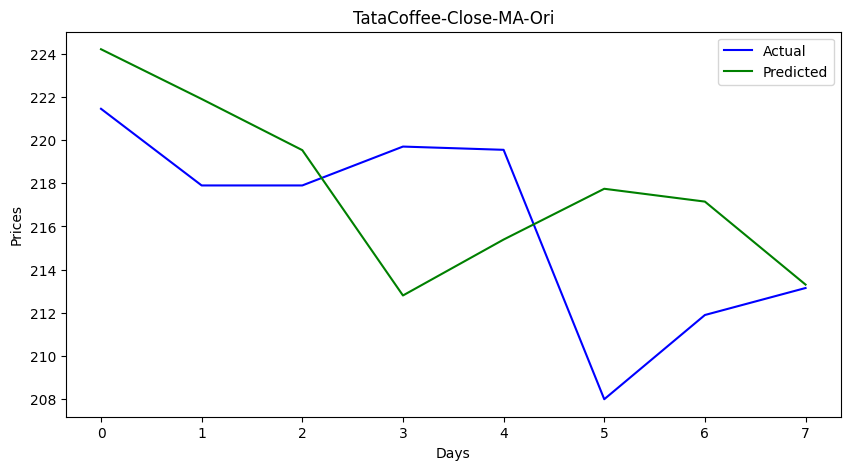

In [22]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [23]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 5.168637900460242
maPe-Testset: 0.0201281691828114


In [24]:
forecast=model_fit.predict(len(data1), len(data1))

In [25]:
forecast

array([0.681239])

In [26]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [27]:
forecast_stock_price_test_oriF

,Closefore
0,215.749933


In [28]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)